## 载入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-"
              "learning-databases/glass/glass.data")

Attribute Information:  

1. Id number: 1 to 214  
2. RI: refractive index  
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)  
4. Mg: Magnesium  
5. Al: Aluminum  
6. Si: Silicon  
7. K: Potassium  
8. Ca: Calcium  
9. Ba: Barium  
10. Fe: Iron  
11. Type of glass: (class attribute)  
-- 1 building_windows_float_processed  
-- 2 building_windows_non_float_processed  
-- 3 vehicle_windows_float_processed  
-- 4 vehicle_windows_non_float_processed (none in this database)  
-- 5 containers  
-- 6 tableware  
-- 7 headlamps     

In [4]:
columns_mapping = {
    'ID': 'ID',
    'RI': '折射率',
    'Na': '钠',
    'Mg': '镁',
    'Al': '铝',
    'Si': '硅',
    'K': '钾',
    'Ca': '钙',
    'Ba': '钡',
    'Fe': '铁',
    'Type': '类型',
}

try:
    df_glass = pd.read_csv("../../data/glass.csv", header=0)
except Exception as e:
    print(e)
    df_glass = pd.read_csv(target_url, header=None, prefix="V")
    df_glass.columns = columns_mapping.keys()
    df_glass.to_csv("../../data/glass.csv", index=False)

df_glass.head()

ID       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [5]:
nrows, ncols = df_glass.shape
print("Number of Rows: ", nrows)
print("Number of Cols: ", ncols)

Number of Rows:  214
Number of Cols:  11


## 玻璃数据的基本统计信息

In [6]:
df_glass_summary = df_glass.describe()

In [7]:
df_glass_summary

ID          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516523   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.122500    8.240000    0.000000    0.000000    1.000000  
50%      0.555000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.172500    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

In [8]:
# 上述结果包含了ID这个没有用的列
df_glass_normalized = df_glass.iloc[:, 1:ncols]
df_glass_normalized.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [9]:
df_glass_normalized_summary = df_glass_normalized.describe()
df_glass_normalized_summary

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [10]:
for i in range(df_glass_normalized.shape[1]):
    mean = df_glass_normalized_summary.iloc[1, i]
    std = df_glass_normalized_summary.iloc[2, i]
    df_glass_normalized.iloc[:, i] = (df_glass_normalized.iloc[:, i] - mean)/std

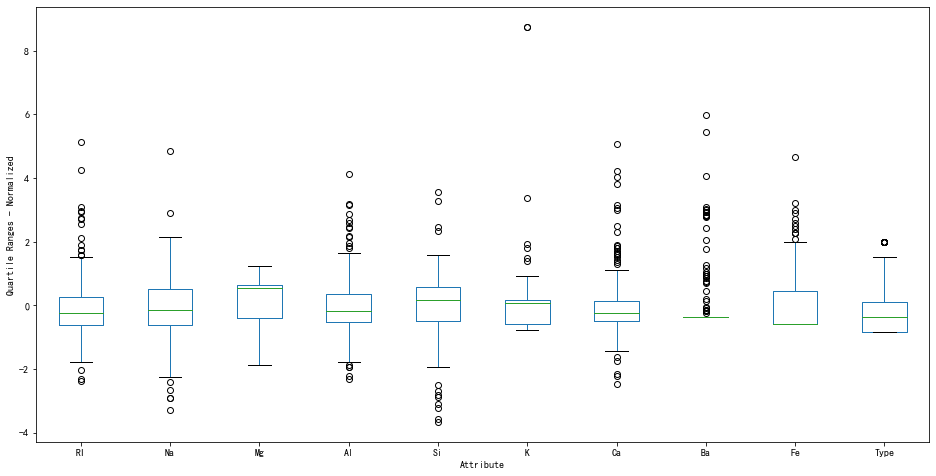

In [11]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(111)
df_glass_normalized.plot(kind='box', ax=ax)
ax.set_xlabel("Attribute")
ax.set_ylabel("Quartile Ranges - Normalized")
plt.show()

注：  
    玻璃数据的箱线图异常点较多，正常吗？  
    （1）这是一个分类问题，在属性值和类别之间不需要存在任何连续性，也就是说不应该期望在各类别之间，属性值是相互接近或近似的  
    （2）它的数据集是非平衡的，成员最多的组76个，最小的9个。统计时，平均值可能是由成员最多的那个类的属性决定，因此不能期望其他类别也有相似的属性值   
    ==>此时使用“平行坐标图”也许可以揭示更多的信息  